In [104]:
import glob
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import show

3278

In [ ]:
# import images for creating dataset
ds_path = 'images'
images = glob.glob(ds_path + "/**/*.png", recursive=True)
len(images)

exploratory data analysis

(964, 1856, 3)


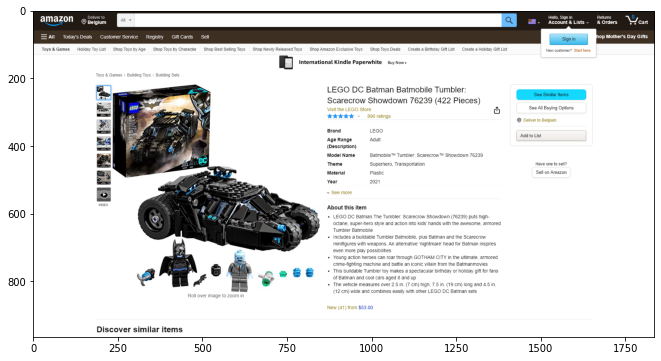

In [146]:
# gets rid of scroll bar so that model wont learn from that
def remove_scrollbar(image_path):
    print(cv.imread(image_path).shape)
    y,x,_ = cv.imread(image_path).shape
    image = cv.imread(image_path)
    img = image[0:y,0:x-20]
    return img
    
img = remove_scrollbar(images[0])
plt.imshow(img)


feature selection

In [105]:
def show_thresholded(image):
    # img = cv.imread(image,0)
    img = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    img = cv.medianBlur(img,5)
    ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
                cv.THRESH_BINARY,11,2)
    th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv.THRESH_BINARY,11,2)
    titles = ['Original Image', 'Global Thresholding (v = 127)',
                'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    thresholded_images = [img, th1, th2, th3]
    for i in range(4):
        plt.rcParams['figure.figsize'] = [18,6]
        plt.subplot(2,2,i+1)
        plt.imshow(thresholded_images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    show()

In [106]:
def show_edges(image):
    img = cv.imread(image)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    edges = cv.Canny(gray,50,200,apertureSize = 3)
    lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    plt.imshow(img)
    show()

In [107]:
def show_histogram(image):
    img = cv.imread(image)
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

In [129]:
for image in images[::100]:
    # image = image[:,:-100]
    # show_thresholded(image)
    # show_edges(image)
    # show_histogram(image)

(964, 1856, 3)


TypeError: string indices must be integers

In [109]:
# # data set preparation
# img_dict = {
#     'label': [],
#     'file_name': [],
#     'px_values': [],
# }

# for image_path in images:
#     img_dict['label'].append(image_path.split('\\')[1])
#     img_dict['file_name'].append(image_path.split('\\')[2])
    
#     image = cv2.imread(image_path)
#     img_dict['px_values'].append(image)

In [110]:
# # create data set with only raw_image and labels
# ds = pd.DataFrame(img_dict)

In [111]:
# # serialize ds into csv
# ds.to_csv('img_ds.csv')

In [112]:
# # verify shape of all images
# ds.px_values.apply(lambda x:x.shape).unique()